# Wiki Scrapin

Wikipedia has an API for accessing random articles, which will help with downloading 1000 articles

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import bs4
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.spatial.distance import cosine
from _utils import *
import csv

In [5]:
WIKIPEDIA_RANDOM = 'https://en.wikipedia.org/wiki/Special:Random'

In [6]:
response = requests.get(WIKIPEDIA_RANDOM)
parsed = bs4.BeautifulSoup(response.text)
parsed.title.string

'Montville Memorial Precinct - Wikipedia'

In [7]:
example_title,example_url,example_text = get_title_and_text()
example_text

'Shapeshifter is the ninth studio album released under the name Gong and the sixth album by the Daevid Allen version of the group. It was released in 1992. It is the first proper album from Daevid Allen\'s Gong since  You from 1974. It is the first album from the original group without founding member Gilli Smyth. Didier Malherbe and Allen are the only two returning performers from the previous album. Pip Pyle, who performed on Continental Circus and Camembert Electrique also returns.\nWith main character Zero the hero, the album continues the Gong mythology, the central part of which was formed with the Radio Gnome Trilogy of albums,[2] comprising Flying Teapot in 1973, followed by Angel\'s Egg, 1973, and You in 1974.\nIn episode four in the album Shapeshifter (1992), Zero meets an urban shaman who agrees to take Zero to the next level of awareness on the proviso that Zero spends nine months on an airplane, travelling where he wants but not using money or eating anything other than ai

In [8]:
word_stemmer(example_text)

['shapeshift',
 'nin',
 'studio',
 'alb',
 'releas',
 'und',
 'nam',
 'gong',
 'six',
 'alb',
 'daevid',
 'al',
 'vert',
 'group',
 '.',
 'releas',
 '1992',
 '.',
 'first',
 'prop',
 'alb',
 'daevid',
 'al',
 "'s",
 'gong',
 'sint',
 '1974',
 '.',
 'first',
 'alb',
 'origin',
 'group',
 'without',
 'found',
 'memb',
 'gill',
 'smy',
 '.',
 'didy',
 'malherb',
 'al',
 'ar',
 'two',
 'return',
 'perform',
 'prevy',
 'alb',
 '.',
 'pip',
 'pyl',
 ',',
 'perform',
 'contin',
 'circ',
 'camembert',
 'electr',
 'also',
 'return',
 '.',
 'main',
 'charact',
 'zero',
 'hero',
 ',',
 'alb',
 'continu',
 'gong',
 'mytholog',
 ',',
 'cent',
 'part',
 'form',
 'radio',
 'gnom',
 'trilog',
 'album',
 ',',
 '[',
 '2',
 ']',
 'compr',
 'fly',
 'teapot',
 '1973',
 ',',
 'follow',
 'angel',
 "'s",
 'eg',
 ',',
 '1973',
 ',',
 '1974',
 '.',
 'episod',
 'four',
 'alb',
 'shapeshift',
 '(',
 '1992',
 ')',
 ',',
 'zero',
 'meet',
 'urb',
 'sham',
 'agr',
 'tak',
 'zero',
 'next',
 'level',
 'aw',
 'proviso

We will use a Tfidf Vectorizer to store the data

In [9]:
tfidf=TfidfVectorizer(use_idf=True, smooth_idf=False)

In [10]:
articles = []
with open(".\\data\\articles.csv","r",encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        if len(row) == 0:
            continue
        articles.append(row)

In [11]:
urls = [row[0] for row in articles]
text = [" ".join(row[1:]) for row in articles]

In [12]:
urls[:3]

['https://en.wikipedia.org/wiki/Joseph_von_Kudler',
 'https://en.wikipedia.org/wiki/American_Foundry_Society',
 'https://en.wikipedia.org/wiki/Raag_Singhal']

In [13]:
text[:3]

["joseph von kudl ( 10 octob 1786 – 6 febru 1853 ) aust econom , jur academ . josef kudl born graz 1786 . study law polit sci univers vienn . bef obtain doct , becam substitut teach stat polit sci . 1810 1821 work graz lyce . found styr agricult socy read assocy graz joanne . gav big contribut cre grow ins company fir dam low austr styr . 1821 , assign chair profess polit sci aust law vienn . [ 1 ] 1824 , publ erklärung des strafgesetzes über schwere polizeiübertretung ( `` expl pen law regard sery pol crim '' ) magazin zeitschrift für österr . rechtsgelehrsamkeit und politisch gesetzkund , becam editor-in-chief 1834 . ther , publ num essay , among oth , tax issu . thought tax levy incom . 1845 , cal particip commit reform system jurisprud study 1848 becam vice-director law polit sci univers vienn . 1846 die grundlehr der volkswirtschaft ( bas principl study nat econom ) publ , writ suggest young archduk wilhelm , polit sci ' stud kudl . thi work defend freedom acquisit , property mov 

In [14]:
df = pd.DataFrame(tfidf.fit_transform(text).toarray(),index=urls,columns=tfidf.get_feature_names_out())
df

,00,000,000bce,000m,000m2,001,001s,002,003,004,...,전병호,터主神,터주신,현무광,𐰉𐰆𐰑𐰣,𐰚𐰇𐰜,𐱅𐰇𐰼𐰚,𐱅𐰇𐰼𐰜,𒀭𒊩𒌆𒌴,𒀭𒊩𒌆𒌴𒊏
https://en.wikipedia.org/wiki/Joseph_von_Kudler,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://en.wikipedia.org/wiki/American_Foundry_Society,0.0,0.037648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://en.wikipedia.org/wiki/Raag_Singhal,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"https://en.wikipedia.org/wiki/South_Wallins,_Kentucky",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://en.wikipedia.org/wiki/Shizzi,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://en.wikipedia.org/wiki/Guess_Who_(EP),0.0,0.027593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"https://en.wikipedia.org/wiki/Ridge_Farm,_Illinois",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://en.wikipedia.org/wiki/Freilassing,0.0,0.063516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"https://en.wikipedia.org/wiki/Steelton,_Pennsylvania",0.0,0.011693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def recommend_articles(df,tfidf,queries,n=3):
    recommended = {}
    q_arrays = []

    for query in queries:
        _,url,text = get_title_and_text(query)
        q_stem = " ".join(word_stemmer(text))
        q_array = tfidf.transform([q_stem]).toarray()[0]
        q_arrays.append(q_array)
        values = (1-df.apply(lambda x: cosine(x, q_array), axis=1).sort_values())
        recommended[query] = (values[:n])

    return recommended

In [16]:
recommend_articles(df,tfidf,[
    "https://en.wikipedia.org/wiki/Battle_of_Berlin",
    "https://en.wikipedia.org/wiki/Communism",
    "https://en.wikipedia.org/wiki/North_Korea",
    "https://en.wikipedia.org/wiki/Ronald_Reagan"
],5)

{'https://en.wikipedia.org/wiki/Battle_of_Berlin': https://en.wikipedia.org/wiki/Meliton_Kantaria                              0.211282
 https://en.wikipedia.org/wiki/Walter_Ulbricht                               0.199253
 https://en.wikipedia.org/wiki/Modlin_Fortress                               0.190938
 https://en.wikipedia.org/wiki/42nd_Division_(Spain)                         0.184120
 https://en.wikipedia.org/wiki/San_Antonio_Market_(Defense_Health_Agency)    0.168967
 dtype: float64,
 'https://en.wikipedia.org/wiki/Communism': https://en.wikipedia.org/wiki/Intercollegiate_Socialist_Society    0.232888
 https://en.wikipedia.org/wiki/Bernard_Koenen                       0.217950
 https://en.wikipedia.org/wiki/Popular_Unity_(Chile)                0.209950
 https://en.wikipedia.org/wiki/Walter_Ulbricht                      0.203509
 https://en.wikipedia.org/wiki/An%C3%ADbal_Escalante                0.201352
 dtype: float64,
 'https://en.wikipedia.org/wiki/North_Korea': https://en.w

In [17]:
recommend_articles(df,tfidf,[
    "https://en.wikipedia.org/wiki/Pozna%C5%84",
    "https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology"
])

{'https://en.wikipedia.org/wiki/Pozna%C5%84': https://en.wikipedia.org/wiki/Gol%C4%99cin_Speedway_Stadium    0.498836
 https://en.wikipedia.org/wiki/Modlin_Fortress                  0.148045
 https://en.wikipedia.org/wiki/New_York_City_Council            0.116406
 dtype: float64,
 'https://en.wikipedia.org/wiki/Pozna%C5%84_University_of_Technology': https://en.wikipedia.org/wiki/Ancient_universities_of_Scotland    0.302649
 https://en.wikipedia.org/wiki/List_of_universities_in_Wales       0.275503
 https://en.wikipedia.org/wiki/West_Morris_Mendham_High_School     0.252444
 dtype: float64}

In [18]:
recommend_articles(df,tfidf,[
    "https://en.wikipedia.org/wiki/Jesus",
    "https://en.wikipedia.org/wiki/Monkey",
    "https://en.wikipedia.org/wiki/Mars",
    "https://en.wikipedia.org/wiki/Chocolate"
])

{'https://en.wikipedia.org/wiki/Jesus': https://en.wikipedia.org/wiki/Rich_Mullins             0.163515
 https://en.wikipedia.org/wiki/Eden_Community           0.148262
 https://en.wikipedia.org/wiki/Entrance_(liturgical)    0.112939
 dtype: float64,
 'https://en.wikipedia.org/wiki/Monkey': https://en.wikipedia.org/wiki/Zoo_Holdings_Group                               0.163062
 https://en.wikipedia.org/wiki/Houston_County_High_School_(Georgia)             0.104480
 https://en.wikipedia.org/wiki/List_of_Marvel_Comics_teams_and_organizations    0.099703
 dtype: float64,
 'https://en.wikipedia.org/wiki/Mars': https://en.wikipedia.org/wiki/Grand_Duchess_Maria_Kirillovna_of_Russia    0.387976
 https://en.wikipedia.org/wiki/Moons_of_Uranus                             0.186737
 https://en.wikipedia.org/wiki/1810_Epimetheus                             0.178877
 dtype: float64,
 'https://en.wikipedia.org/wiki/Chocolate': https://en.wikipedia.org/wiki/Z%C3%BCrcher_Murren    0.076756
 https://en.

In [19]:
recommend_articles(df,tfidf,[
    "https://en.wikipedia.org/wiki/Kurt_Cobain",
    "https://en.wikipedia.org/wiki/Bob_Marley",
    "https://en.wikipedia.org/wiki/Elvis_Presley",
    "https://en.wikipedia.org/wiki/Burzum"
])

{'https://en.wikipedia.org/wiki/Kurt_Cobain': https://en.wikipedia.org/wiki/Pushing_the_Senses      0.354232
 https://en.wikipedia.org/wiki/Trouble_Will_Find_Me    0.346866
 https://en.wikipedia.org/wiki/Mr_Floppy               0.281009
 dtype: float64,
 'https://en.wikipedia.org/wiki/Bob_Marley': https://en.wikipedia.org/wiki/Pushing_the_Senses      0.332090
 https://en.wikipedia.org/wiki/Trouble_Will_Find_Me    0.291880
 https://en.wikipedia.org/wiki/Livingston_(band)       0.254691
 dtype: float64,
 'https://en.wikipedia.org/wiki/Elvis_Presley': https://en.wikipedia.org/wiki/Pushing_the_Senses      0.126374
 https://en.wikipedia.org/wiki/George_Sluppick         0.121462
 https://en.wikipedia.org/wiki/Trouble_Will_Find_Me    0.117222
 dtype: float64,
 'https://en.wikipedia.org/wiki/Burzum': https://en.wikipedia.org/wiki/Pushing_the_Senses      0.442798
 https://en.wikipedia.org/wiki/Trouble_Will_Find_Me    0.374461
 https://en.wikipedia.org/wiki/Ajattara                0.357045
 dtyp

In [20]:
recommend_articles(df,tfidf,[
    "https://en.wikipedia.org/wiki/FIFA_World_Cup",
    "https://en.wikipedia.org/wiki/Iga_%C5%9Awi%C4%85tek",
    "https://en.wikipedia.org/wiki/Adam_Ma%C5%82ysz",
    "https://en.wikipedia.org/wiki/Mariusz_Pudzianowski"
])

{'https://en.wikipedia.org/wiki/FIFA_World_Cup': https://en.wikipedia.org/wiki/2015_CONCACAF_U-20_Championship    0.454550
 https://en.wikipedia.org/wiki/InterVarsity_Hockey                0.292618
 https://en.wikipedia.org/wiki/Robin_Hull                         0.246095
 dtype: float64,
 'https://en.wikipedia.org/wiki/Iga_%C5%9Awi%C4%85tek': https://en.wikipedia.org/wiki/Robin_Hull                         0.343693
 https://en.wikipedia.org/wiki/West_Morris_Mendham_High_School    0.249162
 https://en.wikipedia.org/wiki/2015_CONCACAF_U-20_Championship    0.238303
 dtype: float64,
 'https://en.wikipedia.org/wiki/Adam_Ma%C5%82ysz': https://en.wikipedia.org/wiki/Morgan_Lake       0.261369
 https://en.wikipedia.org/wiki/Robin_Hull        0.206008
 https://en.wikipedia.org/wiki/Daniel_Podence    0.185078
 dtype: float64,
 'https://en.wikipedia.org/wiki/Mariusz_Pudzianowski': https://en.wikipedia.org/wiki/Riddick_Bowe_vs._Andrew_Golota_II                                                    0.

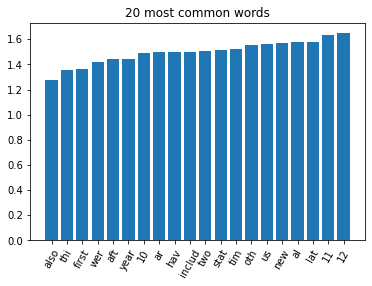

In [21]:
values = pd.Series(tfidf.idf_, index=tfidf.get_feature_names_out()).sort_values()[:20]
x,y = values.index,values

plt.bar(x,y)
plt.xticks(rotation = 60)
plt.title("20 most common words")
plt.show()

c:\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 73773 (\N{CUNEIFORM SIGN AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 74409 (\N{CUNEIFORM SIGN SAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 74502 (\N{CUNEIFORM SIGN TUG2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 74548 (\N{CUNEIFORM SIGN UR4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 74383 (\N{CUNEIFORM SIGN RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


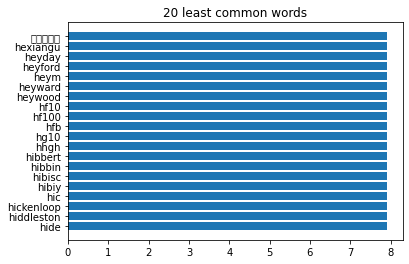

In [22]:
values = pd.Series(tfidf.idf_, index=tfidf.get_feature_names_out()).sort_values()[-20:]
x,y = values.index,values

plt.barh(x,y)
plt.title("20 least common words")
plt.show()

In [79]:
def explain(df,tfidf,recommendation):

    color_palette = [
    'blue', 'green', 'red', 'purple', 'orange',
    'cyan', 'magenta', 'yellow', 'brown', 'pink',
    'lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightgray',
    (0.2, 0.8, 0.4), (0.8, 0.2, 0.4), (0.4, 0.4, 0.8), (0.8, 0.8, 0.2), (0.2, 0.6, 0.8)
    ]

    for url,recommends in recommendation.items():
        _,_,text = get_title_and_text(url)
        q_array = tfidf.transform([" ".join(word_stemmer(text))]).toarray()[0]
        
        values = pd.Series(q_array, index=df.columns).sort_values()[::-1][:20]
        x,y = values.index,values
        colors = dict([(a,color_palette[i]) for i,a in enumerate(x)])
        fig, ax = plt.subplots(len(recommends)+1,1,figsize = (10,10))
        fig.tight_layout(pad=5.0)
        ax[0].title.set_text(url)
        ax[0].bar(x,y,
                  color=[colors.get(color,"gray") for color in x])
        ax[0].tick_params(labelrotation=45)
        for i in range(0,len(recommends)):
            r_url = recommends.index[i]
            values = df.loc()[r_url].sort_values()[::-1][:20]
            x,y = values.index,values
            ax[i+1].bar(x,y,
                        color=[colors.get(color,"gray") for color in x])
            ax[i+1].tick_params(labelrotation=45)
            ax[i+1].title.set_text(r_url)
        plt.show()


In [68]:
recoms = recommend_articles(df,tfidf,[
    "https://en.wikipedia.org/wiki/Mars",
    "https://en.wikipedia.org/wiki/Armenian_cuisine"
],3)

recoms

{'https://en.wikipedia.org/wiki/Mars': https://en.wikipedia.org/wiki/Grand_Duchess_Maria_Kirillovna_of_Russia    0.387976
 https://en.wikipedia.org/wiki/Moons_of_Uranus                             0.186737
 https://en.wikipedia.org/wiki/1810_Epimetheus                             0.178877
 dtype: float64,
 'https://en.wikipedia.org/wiki/Armenian_cuisine': https://en.wikipedia.org/wiki/Armenian_cuisine    1.000000
 https://en.wikipedia.org/wiki/Figgy_pudding       0.184202
 https://en.wikipedia.org/wiki/Princess_(food)     0.184137
 dtype: float64}

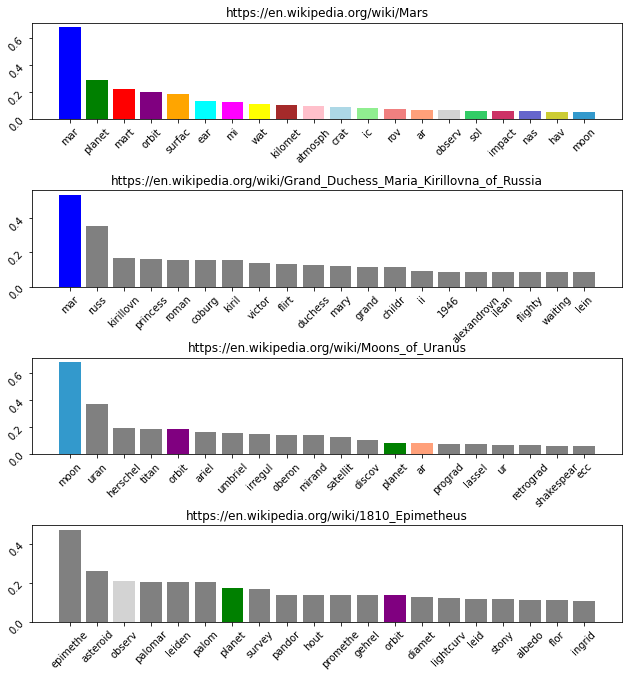

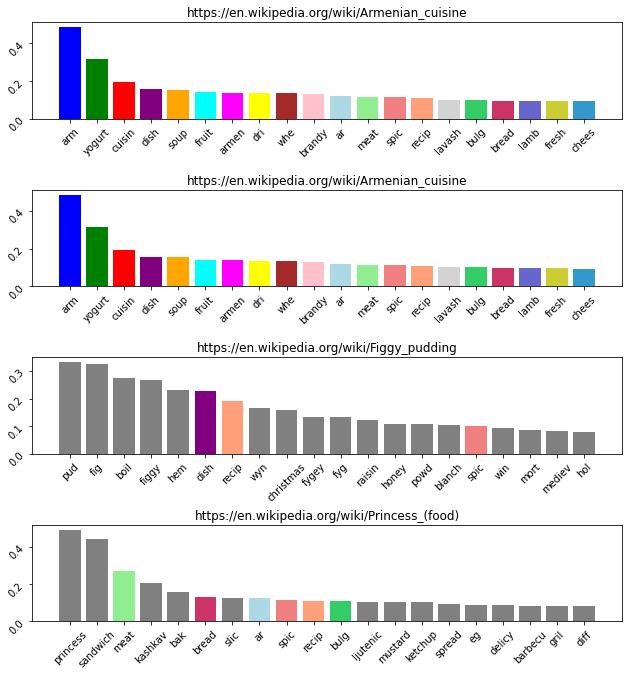

In [80]:
explain(df,tfidf,recoms)

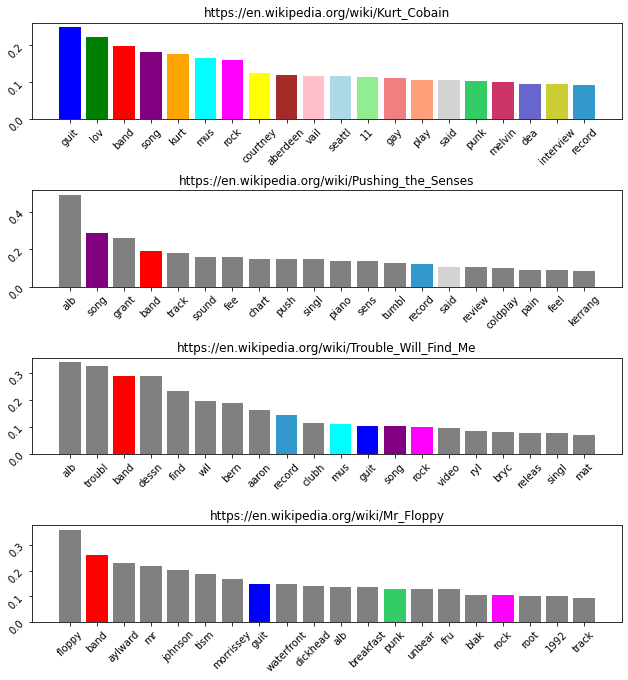

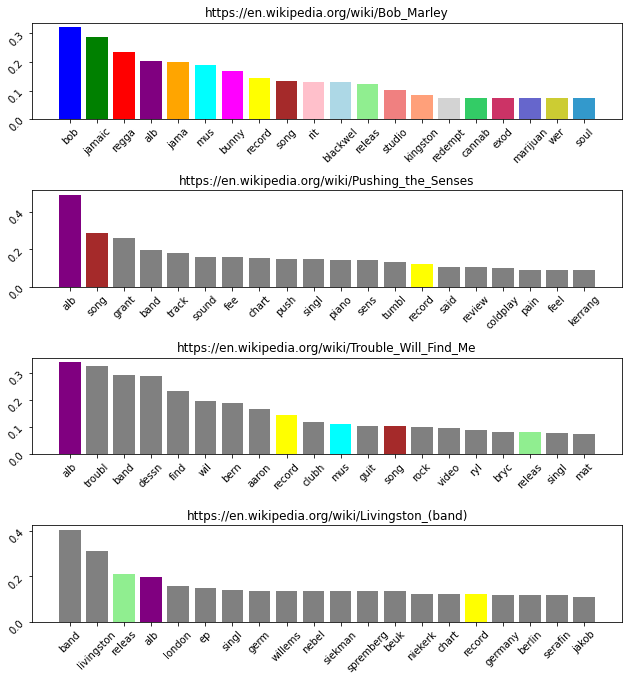

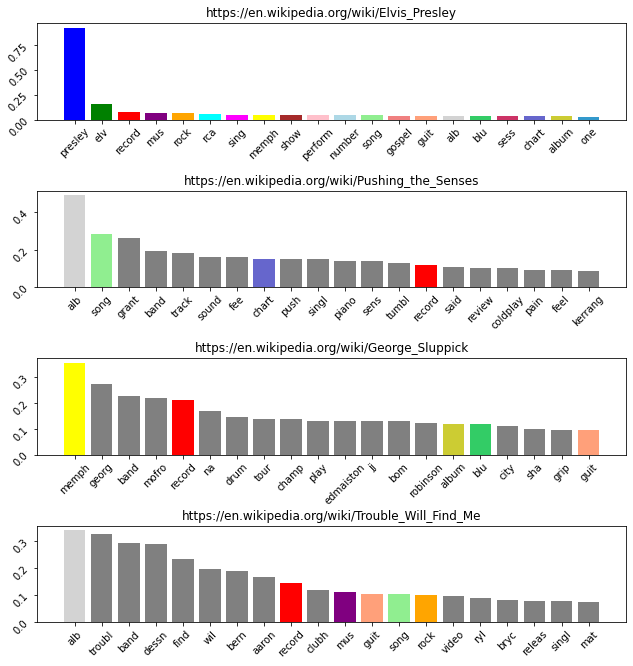

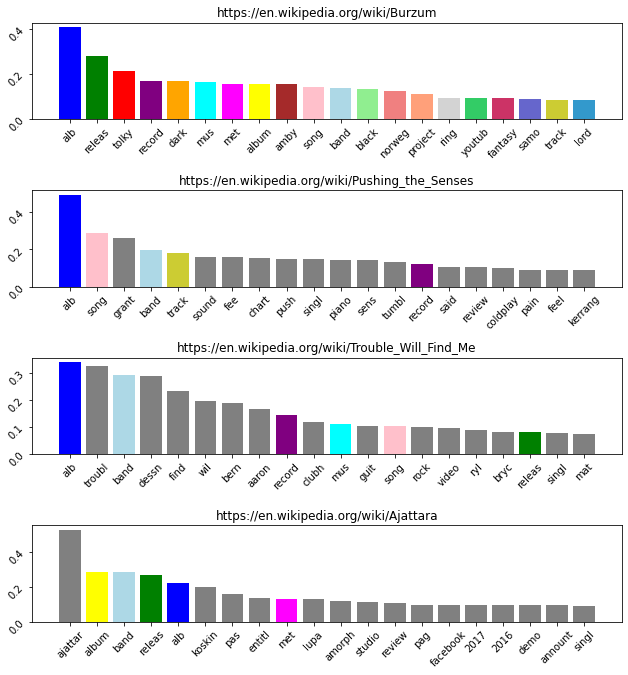

In [81]:
explain(df,tfidf,recommend_articles(df,tfidf,[
    "https://en.wikipedia.org/wiki/Kurt_Cobain",
    "https://en.wikipedia.org/wiki/Bob_Marley",
    "https://en.wikipedia.org/wiki/Elvis_Presley",
    "https://en.wikipedia.org/wiki/Burzum"
]))